# Lesson - Exploring the outputs from the WRF | WRF-Hydro modeling system

## Overview
In this lesson we briefly explore the outputs from the coupled WRF | WRF-Hydro model using Python. 

## Viewing your model output

All of the output data from this WRF | WRF-Hydro simulation are stored in netCDF files. Note that there are a number of utilites available for viewing and manipulating data in this format (e.g. ncview, NCO, Panoply) and packages available for reading these files using common languages for data analysis (e.g. R, Python, NCL). 

Here we will take a look at several of the output files using a couple of useful open source Python packages.

**Import the required Python modules**

First we import the required Python modules for this section.  These include [xarray](http://xarray.pydata.org), a Python package for data analysis with labeled arrays, and pyplot from [matplotlib](https://matplotlib.org/), a commonly used Python plotting package.

In [1]:
import xarray as xr
from matplotlib import pyplot as plt

xr.set_options(display_style='html')

**Open your dataset**

Next we open a multifile dataset consisting of our gridded channel output files using xarray.  You will note that rather than explicitly specifying all of the filepaths we can use a wildcard to grab files for all dates.

In [6]:
ds = xr.open_mfdataset('/home/docker/wrf-hydro-training/output/run/WRF/*.CHRTOUT_GRID2',
                       combine='by_coords')

ds

<xarray.Dataset>
Dimensions:         (reference_time: 1, time: 13, x: 204, y: 120)
Coordinates:
  * time            (time) datetime64[ns] 2013-09-09T18:00:00 ... 2013-09-10T...
  * reference_time  (reference_time) datetime64[ns] 2013-09-09T18:00:00
  * x               (x) float64 -6.116e+04 -6.091e+04 ... -1.066e+04 -1.041e+04
  * y               (y) float64 -1.329e+04 -1.304e+04 ... 1.621e+04 1.646e+04
Data variables:
    crs             (time) |S1 b'' b'' b'' b'' b'' b'' ... b'' b'' b'' b'' b''
    index           (time, y, x) float64 dask.array<chunksize=(1, 120, 204), meta=np.ndarray>
    streamflow      (time, y, x) float32 dask.array<chunksize=(1, 120, 204), meta=np.ndarray>
Attributes:
    model_initialization_time:  2013-09-09_18:00:00
    model_output_valid_time:    2013-09-09_18:00:00
    model_total_valid_times:    0
    Conventions:                CF-1.6
    code_version:               v5.1.2
    model_output_type:          channel_rt
    model_configuration:        default
    proj4:                      +proj=lcc +units=m +a=6370000.0 +b=6370000.0 ...
    GDAL_DataType:              Generic

**Plot your data**

Now we will plot the streamflow data as faceted grids (one for each output time step).  While we do not see a large response, you can see some streamflow particularly in the upper right portion of the domain.

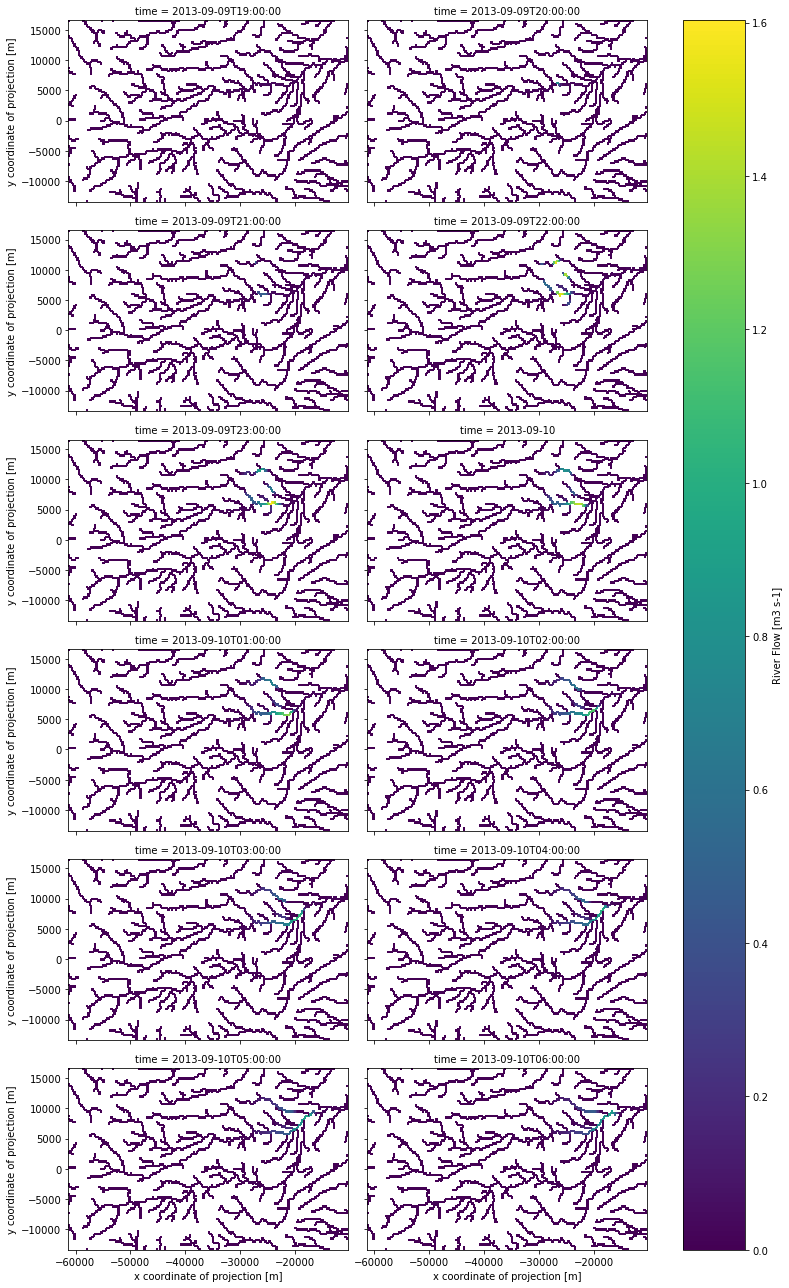

In [3]:
ds.streamflow[1:].plot(col='time', col_wrap=2, vmin=0, aspect=ds.x.size/ds.y.size)

This concludes the lesson. 

If you have extra time, consider plotting some of the other outputs from this simulation.  

© UCAR 2020